# Zelf gemaakte formules die ik misschien ga gebruiken

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

def find_regressionline(dataset: pd.DataFrame, x: str, y: str) -> LinearRegression:
    onafhankelijke_variabele = dataset[x].values
    afhankelijke_variabele = dataset[y].values

    regressionline = LinearRegression()
    regressionline.fit(
        onafhankelijke_variabele.reshape(-1, 1), afhankelijke_variabele)

    return regressionline


def find_regressionline_voorwaarde(dataset: pd.DataFrame, xwaarde, ywaarde, x: str, y: str) -> LinearRegression:
    onafhankelijke_variabele = dataset[xwaarde][x].values
    afhankelijke_variabele = dataset[ywaarde][y].values

    regressionline = LinearRegression()
    regressionline.fit(
        onafhankelijke_variabele.reshape(-1, 1), afhankelijke_variabele)

    return regressionline


def plot_regressionline_voorwaarde(dataset: pd.DataFrame, xwaarde, ywaarde, x: str, y: str, regressielijn: LinearRegression, title: str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[xwaarde][x], y=dataset[ywaarde]
                    [y], data=dataset, color='orange', s=100)
    sns.lineplot(dataset[xwaarde][x], regressielijn.predict(
        dataset[xwaarde][x].values.reshape(-1, 1)), color='violet', linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()


def plot_regressionline(dataset: pd.DataFrame, x: str, y: str, regressielijn: LinearRegression, title: str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y],
                    data=dataset, color='orange', s=100)
    sns.lineplot(dataset[x], regressielijn.predict(
        dataset[x].values.reshape(-1, 1)), color='violet', linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()


def geef_naam(titel, x_as, y_as):
    plt.title(titel)
    plt.x


def boxplot(data, x, y='', xlabel='', ylabel='', title=''):
    end = title
    if y == '':
        sns.boxplot(data=data, x=x)
        title = f'Grafiek van {x}'
    else:
        sns.boxplot(data=data, y=y, x=x)
        title = f'Grafiek van {x} en {y}'
    if end != '':
        plt.title(end)
    else:
        plt.title(title)
    if xlabel != '':
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.show()


def histogram(data='d', x='', y='', xlabel='', ylabel='', title=''):
    end = title
    if y == '':
        if type(data) != type('d'):
            sns.histplot(data=data, x=x)
            title = f'Grafiek van {x}'
            pass
        else:
            sns.histplot(x=x)
            title = f'Grafiek van {x}'
            pass
    else:
        sns.histplot(data=data, x=x, y=y)
        title = f'Grafiek van {x} en {y}'
        pass
    if end != '':
        plt.title(end)
    else:
        plt.title(title)
    if xlabel != '':
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.show()


def get_bins(df, kolom):
    rang = df[kolom].max()-df[kolom].min()
    bins = (rang/(np.sqrt(df[kolom].count())))
    bins = np.arange(df[kolom].min(), df[kolom].max(), bins)
    return bins


def distplot(df, kolom):
    bns = get_bins(df, kolom)
    sns.distplot(x=df[kolom], bins=bns, kde=False)
    plt.title(f'Grafiek van {kolom}')


def catplot(data, x, y='', kind='', xlabel='', ylabel='', title='', xticks=[], xtickss=[]):
    end = title
    if y == '':
        sns.catplot(data=data, x=x, kind=kind)
        title = f'Grafiek van {x}'
        pass
    else:
        sns.catplot(data=data, x=x, y=y, kind=kind)
        title = f'Grafiek van {x} en {y}'
        pass
    if xlabel != '':
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    if xticks != []:
        plt.xticks(xticks, xtickss)
    if end != '':
        plt.title(end)
    else:
        plt.title(title)
    plt.show()


def print_calculations(dataKolom):
    print(f"Het gemiddelde is {dataKolom.mean()}")
    print(f"De median is {dataKolom.median()}")
    print(f"De var is {dataKolom.var()}")
    print(f"Standaardafwijking is {dataKolom.std()}")
    print(f"Q1 is {dataKolom.quantile(0.25)}")
    print(f"Q3 is {dataKolom.quantile(0.75)}")
    print(f"De IQR is{dataKolom.quantile(0.75)-dataKolom.quantile(0.25)}")
    rang = dataKolom.max()-dataKolom.min()
    print(f"Skewness is {dataKolom.skew()}")
    print(f"Kurt: {dataKolom.kurt()}")
    print(dataKolom.mode)

def is_norm(df='', x='', xvoorwaarde='',xvoorwaarde_column=''):
    if x!='' and xvoorwaarde_column!='':
        y = df[xvoorwaarde_column] == xvoorwaarde
        x_tot = df[y][x].count()
        x_avg = df[y][x].mean()
        x_std = df[y][x].std()

        test = df[(y) & (df[x] > x_avg-x_std) & (df[x] < x_avg + x_std)][x].count()
        test2 = df[(y) & (df[x] > x_avg-2*x_std) & (df[x] < x_avg + 2*x_std)][x].count()
        test3 = df[(y) & (df[x] > x_avg-3*x_std) & (df[x] < x_avg + 3*x_std)][x].count()

        print(f'de - en + 1 std procent is {(test / x_tot)}\nde - en + 2 std procent is {(test2 / x_tot)}\nde - en + 3 std procent is {(test3 / x_tot)}')
    else:
        x_tot = df[x].count()
        x_avg = df[x].mean()
        x_std = df[x].std()
        test = df[(df[x] > x_avg-x_std) & (df[x] < x_avg + x_std)][x].count()
        test2 = df[(df[x] > x_avg-2*x_std) & (df[x] < x_avg + 2*x_std)][x].count()
        test3 = df[(df[x] > x_avg-3*x_std) & (df[x] < x_avg + 3*x_std)][x].count()

        print(f'de - en + 1 std procent is {(test / x_tot)}\nde - en + 2 std procent is {(test2 / x_tot)}\nde - en + 3 std procent is {(test3 / x_tot)}')

# <span style="color:mediumvioletred"> Examen data science 18/01/2023

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

## <span style="color:orange">  Deel 1: bench press competition

<img src="competitie.PNG">

Gegeven is de dataset `benchpress_competition.csv` Deze dataset bevat gegevens van een bodybuilder competitie. Het doel van deze dataset is om te voorspellen hoeveel kg een atleet kan bench pressen aan de hand van de andere features.

| Variable Name |Description | Soort variabele |
| --- | --- | ---|
|playerId 	|Id of the competitor|discreet| 
|Name | Name of the competitor|nominaal| 
|Sex | Sex of the competitor|Nominaal|
|Equipment | Which additional equipment the competitor used|Nominal|
|Age | The age of the competitor|continue|
|BodyweightKg | The weight of the competitor (in kg)|continue|
|BestSquatKg| The most weight the competitor could squat (in kg) |continue|
|BestDeadliftKg | The most weight the competitor could deadlift (in kg)|continue|
|BestBenchKg | The most weight the competitor could bench press (in kg) (target) |continue|


Laad de dataset `benchpress_competition.csv` in.

In [115]:
df= pd.read_csv('benchpress_competition.csv')
df.head(10)

,playerId,Name,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,BestBenchKg
0,19391.0,Carlos Ceron,M,Raw,23.0,87.3,205.0,235.0,125.0
1,15978.0,Tito Herrera,M,Wraps,23.0,73.48,220.0,260.0,157.5
2,27209.0,Levi Lehman,M,Raw,26.0,112.4,142.5,220.0,145.0
3,27496.0,Stacy Hayford,F,Raw,35.0,59.42,95.0,102.5,60.0
4,20293.0,Brittany Hirt,F,Raw,26.5,61.4,105.0,127.5,60.0
5,25176.0,Zoran Jankovski,M,Wraps,23.0,113.5,260.0,285.0,160.0
6,128.0,Mitchell Hayes,M,Raw,22.5,90.55,162.5,200.0,107.5
7,28187.0,John Gibson,M,Raw,24.0,100.0,200.0,227.5,180.0
8,8022.0,Sakiko Ito,F,Single-ply,19.5,51.2,115.0,127.5,62.5
9,22487.0,Lorrie Bosen,F,Raw,54.0,65.25,72.5,115.0,55.0


a. Vul het bovenstaande schema aan, welk datatype is aanwezig in iedere kolom? (Kies uit: kwalitatief nominaal, kwalitatief ordinaal, kwantitatief discreet of kwantitatief continu)

b. Hoeveel rijen zijn aanwezig in de dataset?

In [116]:
print('Er zijn 30000 rijen aanwezig')
df.shape


Er zijn 30000 rijen aanwezig


(30000, 9)

c. De dataset bevat foutieve/ onrealistische waarden die ontstaan zijn door een foutieve manuele ingave. Wat is de fout in de data? Corrigeer de foutieve waarden, indien dit niet lukt kun je de dataset benchpress_competition_preprocessed inladen en hier verder mee werken. 

In [117]:
df.isnull().sum()

playerId            0
Name                0
Sex                 0
Equipment           0
Age               420
BodyweightKg        0
BestSquatKg         0
BestDeadliftKg      0
BestBenchKg         0
dtype: int64

In [118]:
df.describe()


,playerId,Age,BestSquatKg,BestDeadliftKg,BestBenchKg
count,30000.000000,29580.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,29.678786,178.249505,201.114296,116.507738
std,8660.398374,11.576102,71.788046,62.369995,52.355810
min,0.000000,7.000000,-330.000000,18.100000,-280.000000
25%,7499.750000,21.500000,122.500000,147.500000,72.500000
50%,14999.500000,26.500000,175.000000,204.120000,115.000000
75%,22499.250000,35.000000,222.500000,247.500000,150.000000
max,29999.000000,89.500000,532.970000,420.500000,425.000000


We zien hier dat er negatieve waardes in zowel de squat als de deadlift zitten. We zullen hierbij deze dan ook verwijderen uit de dataset. We zien ook dat er 420 lege leeftijden zijn deze zullen we ook direct verwijderen (aangezien leeftijd toch een belangrijke factor is bij powerlifting)

In [119]:
l = ['BestSquatKg', 'BestBenchKg']

for i in l:
    df = df[df[i]>0]

df.describe()

,playerId,Age,BestSquatKg,BestDeadliftKg,BestBenchKg
count,29859.000000,29440.000000,29859.000000,29859.000000,29859.000000
mean,15001.438729,29.686090,179.255166,201.139812,116.962760
std,8662.142324,11.584712,69.309340,62.377212,51.338696
min,0.000000,7.000000,13.600000,18.100000,9.100000
25%,7498.500000,21.500000,125.000000,147.500000,72.500000
50%,15005.000000,26.500000,175.000000,204.120000,115.000000
75%,22497.500000,35.000000,222.500000,247.500000,150.000000
max,29999.000000,89.500000,532.970000,420.500000,425.000000


In [120]:
df.dropna(inplace=True)

In [121]:
df.shape

(29440, 9)

d. Verwijder de kolom met de naam van de atleet uit de dataset. Waarom is deze kolom niet nuttig en kan deze verwijderd worden?

In [122]:
print('deze kolom heeft geen invloed op de data')
df.drop('Name',axis=1, inplace=True)

deze kolom heeft geen invloed op de data


e. Welke equipment wordt het meest gebruikt? Is er hierbij een verschil tussen de mannen en vrouwen? Staaf je antwoord aan de hand van een gepaste plot. 

In [123]:
df_m = df[df['Sex']=='M']
df_F = df[df['Sex']=='F']


We zien overduidelijk dat de meestelifts zowel bij mannen als vrouwen raw zijn. Dan gebruiken zowel mannen als vrouwen het meeste wraps als ze equipment gebruiken


/var/folders/82/b57kstbn303cy1b030wlchqm0000gn/T/ipykernel_9145/4046723882.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


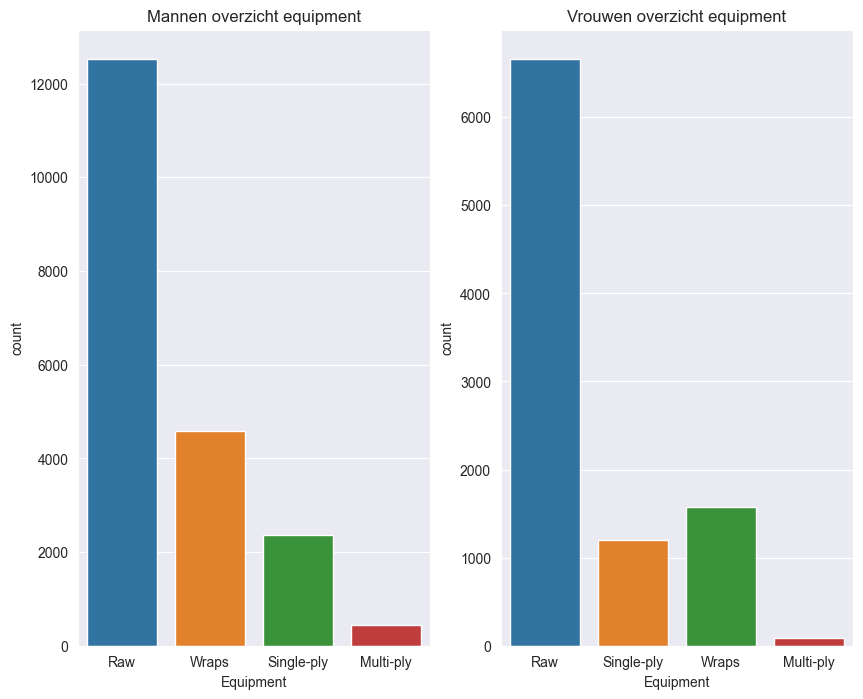

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
sns.countplot(data=df_m , x='Equipment', ax=ax[0])
sns.countplot(data=df_F,x='Equipment', ax=ax[1])
ax[0].set_title('Mannen overzicht equipment')
ax[1].set_title('Vrouwen overzicht equipment')
fig.show()
print('We zien overduidelijk dat de meestelifts zowel bij mannen als vrouwen raw zijn. Dan gebruiken zowel mannen als vrouwen het meeste wraps als ze equipment gebruiken')


f. Hoeveel vrouwen die geen equipment (raw) gebruiken, kunnen meer dan 250kg squatten?

In [125]:
f_raw_250 = df_F[(df_F['Equipment']=='Raw') & (df_F['BestSquatKg'] >250)]['Sex'].count()
print(f'Er kunnen {f_raw_250} vrouwen raw meer dan 250KG squaten')

Er kunnen 2 vrouwen raw meer dan 250KG squaten


g. Maak een histogram van de kolom Age. Verdeel zelf in klasses aan de hand van de klassenbreedte. Rond de klassenbreedte af naar boven. (https://numpy.org/doc/stable/reference/generated/numpy.ceil.html)

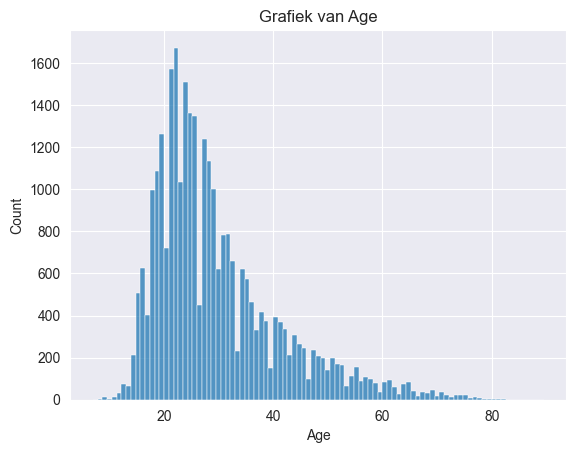

In [126]:
histogram(data=df, x='Age')

h. Is deze data normaalverdeeld? Staaf je antwoord aan de hand van de geziene methode die gebruik maakt van het gemiddelde en de standaardafwijking. 

In [127]:
is_norm(df=df,x='Age')
print('Als we naar de waarden kijken zien we dat + en - 2 ongeveer 94 % procent is. Dit ligt wat aat de lage kant voor een normaal verdeling. Maar ik denk nog steeds dat het wel ongeveer Normaal verdeelt is.')

de - en + 1 std procent is 0.7480638586956522
de - en + 2 std procent is 0.9438179347826087
de - en + 3 std procent is 0.9843410326086957
Als we naar de waarden kijken zien we dat + en - 2 ongeveer 94 % procent is. Dit ligt wat aat de lage kant voor een normaal verdeling. Maar ik denk nog steeds dat het wel ongeveer Normaal verdeelt is.


i. Iemand beweert dat het type equipment dat gebruikt wordt een invloed zal hebben op hoeveel iemand kan "bench pressen". Klopt deze bewering? Staaf je antwoord aan de hand van een boxplot. (werk eventueel met subplotjes)

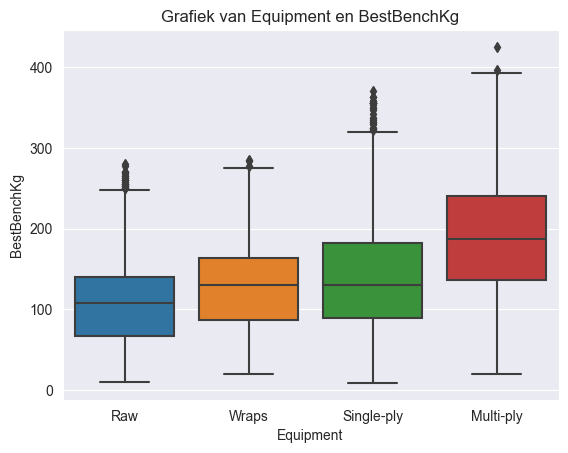

Hier zien we inderdaad dat de equipment een grote rol speelt in hoeveel een persoon kan bench pressen


In [128]:
boxplot(data=df,x='Equipment', y='BestBenchKg')
print('Hier zien we inderdaad dat de equipment een grote rol speelt in hoeveel een persoon kan bench pressen')

j. Welke variabele zou je gebruiken indien je het aantal kilogram dat iemand kan "bench pressen" te voorspellen. Staaf je antwoord aan de hand van de heatmap en correlatiecoefficienten.

We zien dat er een zeer hoog verband ligt tussen de persoon zijn Bench en Squat/Deadlift. Aangezien de correlatie tussen Squat en Bench het hoogst is zou ik de Squat gebruiken om de Bench te voorspellen


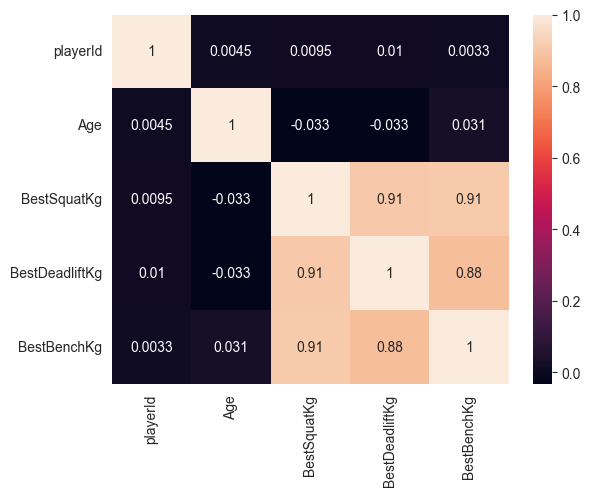

In [129]:
corr = df.corr()
sns.heatmap(data=corr, annot=True)
print('We zien dat er een zeer hoog verband ligt tussen de persoon zijn Bench en Squat/Deadlift. Aangezien de correlatie tussen Squat en Bench het hoogst is zou ik de Squat gebruiken om de Bench te voorspellen')

k. Bepaal en teken de regressielijn tussen de gekozen kolom en BenchPressKg. Geef de vergelijking van de regressielijn. Wat betekenen de coëfficiënten van de rechte?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


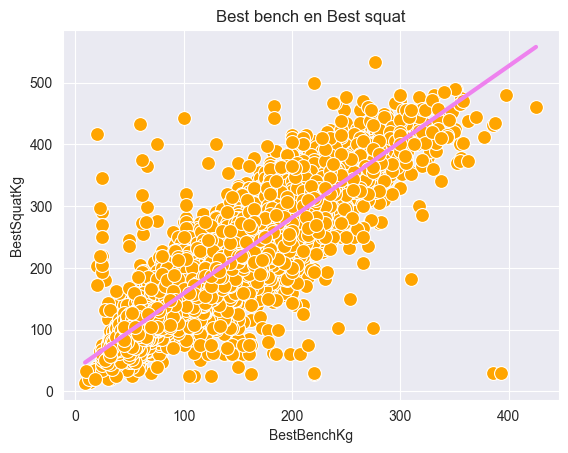

In [130]:
line = find_regressionline(df,'BestBenchKg','BestSquatKg')
plot_regressionline(df,'BestBenchKg','BestSquatKg', line, 'Best bench en Best squat')

In [131]:
onafhankelijke_variabele = df['BestBenchKg'].values
afhankelijke_variabele = df['BestSquatKg'].values

x = onafhankelijke_variabele.reshape(-1, 1)
y = afhankelijke_variabele


In [132]:
intercept = line.intercept_
coef = line.coef_[0]
print(f'de equation is : {coef} * Bench Kg + {intercept}')

de equation is : 1.2292385832429626 * Bench Kg + 35.50468944887197


l. Bepaal de R² - waarde van het model. Wat is de betekenis hiervan?

In [133]:
print('De betekenis hiervan is dat we met een redelijk grote zekerhied de y waarde vna de x waarde kunnen afleiden')
line.score(x,y)



De betekenis hiervan is dat we met een redelijk grote zekerhied de y waarde vna de x waarde kunnen afleiden


0.8281659873944883

m. Kan je een betere voorspelling van BestBenchKg doen aan de hand van de gekozen kolom indien je het type equipment in rekening brengt?  


In [134]:
df_raw = df[df['Equipment']=='Raw']
df_wraps = df[df['Equipment']=='Wraps']
df_single = df[df['Equipment']=='Single-ply']
df_multi = df[df['Equipment']=='Multi-ply']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


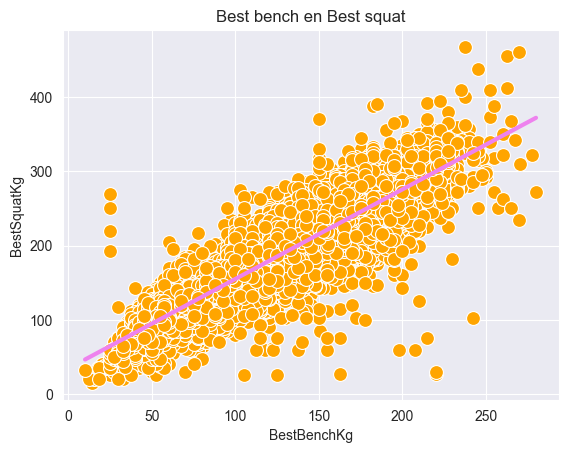

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


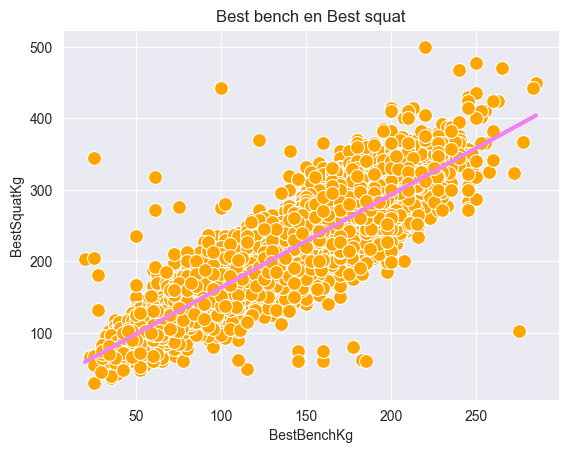

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


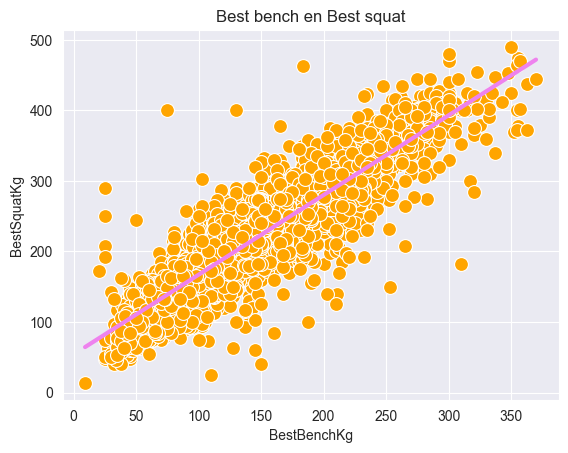

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


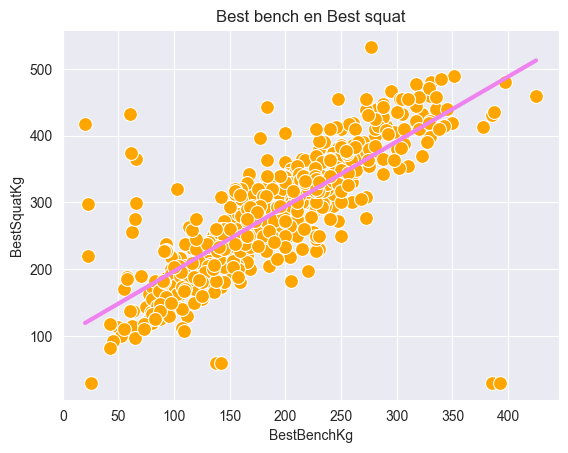

In [135]:
line = find_regressionline(df_raw,'BestBenchKg','BestSquatKg')
plot_regressionline(df_raw,'BestBenchKg','BestSquatKg', line, 'Best bench en Best squat')

line = find_regressionline(df_wraps, 'BestBenchKg', 'BestSquatKg')
plot_regressionline(df_wraps, 'BestBenchKg', 'BestSquatKg',
                    line, 'Best bench en Best squat')

line = find_regressionline(df_single, 'BestBenchKg', 'BestSquatKg')
plot_regressionline(df_single, 'BestBenchKg', 'BestSquatKg',
                    line, 'Best bench en Best squat')

line = find_regressionline(df_multi, 'BestBenchKg', 'BestSquatKg')
plot_regressionline(df_multi,'BestBenchKg','BestSquatKg', line, 'Best bench en Best squat')

In [136]:
l=[df_raw,df_multi,df_single,df_wraps]
o = ['raw','multi','single','wraps']

for i in range(4):
    line = find_regressionline(l[i], 'BestBenchKg', 'BestSquatKg')

    onafhankelijke_variabele = l[i]['BestBenchKg'].values
    afhankelijke_variabele = l[i]['BestSquatKg'].values

    x = onafhankelijke_variabele.reshape(-1, 1)
    y = afhankelijke_variabele

    score = line.score(x,y)
    print(f'De score van {o[i]} is {score}')

De score van raw is 0.827421096211823
De score van multi is 0.6232292044353402
De score van single is 0.8189514910049438
De score van wraps is 0.8122337090387427


In [137]:
print('Als we equipment gaan meerekenen zien we dat de r^2 score ongeveer gelijk is met maar 1 uitzondering en dat is voor multi fly')

Als we equipment gaan meerekenen zien we dat de r^2 score ongeveer gelijk is met maar 1 uitzondering en dat is voor multi fly


n. Welke methode geniet jouw voorkeur en waarom? (Maw zou je zelf het type equipment in rekening brengen en waarom wel/waarom niet?)

In [138]:
print('Ik zou het persoonlijk niet splitsen aangezien het niet zo een grote invloed heeft. Zeker aangezien meer dan de helft raw is. ZOuden we een kleinere dataset moeten hebben met veel minder Raw dan zou de impact van de multi en single flys waarschijnlijk groter zijn en dan zou splitsen belangrijk zijn.')

Ik zou het persoonlijk niet splitsen aangezien het niet zo een grote invloed heeft. Zeker aangezien meer dan de helft raw is. ZOuden we een kleinere dataset moeten hebben met veel minder Raw dan zou de impact van de multi en single flys waarschijnlijk groter zijn en dan zou splitsen belangrijk zijn.


## <span style="color:orange">  Deel 2 - Tijdsreeksen

Het bestand tijdsreeks.csv bevat dezelfde tijdsreeks als het excel bestand waar het aantal verkopen per maand gedurende 3 jaar is bijgehouden.  
a. Laad het bestand Tijdsreeks.csv in als de dataset, gebruik de kolom Maand nummer als de index kolom

In [139]:
df = pd.read_csv('Tijdsreeks.csv')
df

,Maand,Maand nummer,Verkopen
0,januari,0,266
1,februari,1,146
2,maart,2,183
3,april,3,119
4,mei,4,180
5,juni,5,169
6,juli,6,232
7,augustus,7,225
8,september,8,193
9,oktober,9,123


b. Maak een grafiek van de tijdreeks

<AxesSubplot:>

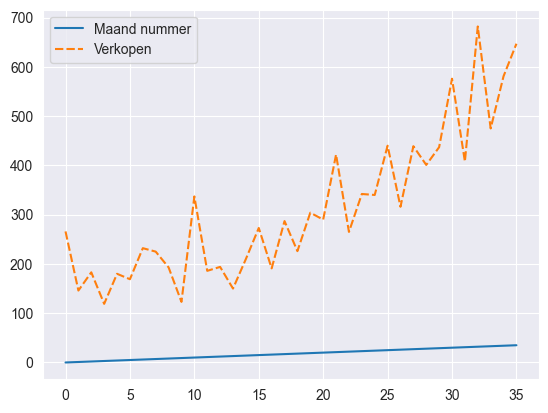

In [140]:
sns.lineplot(data=df)

c. Bepaal de trend in de tijdreeks en geef de vergelijking.

Intercept = 101.32582582582577
Richtingscoëfficiënt =  12.07503217503218


<AxesSubplot:>

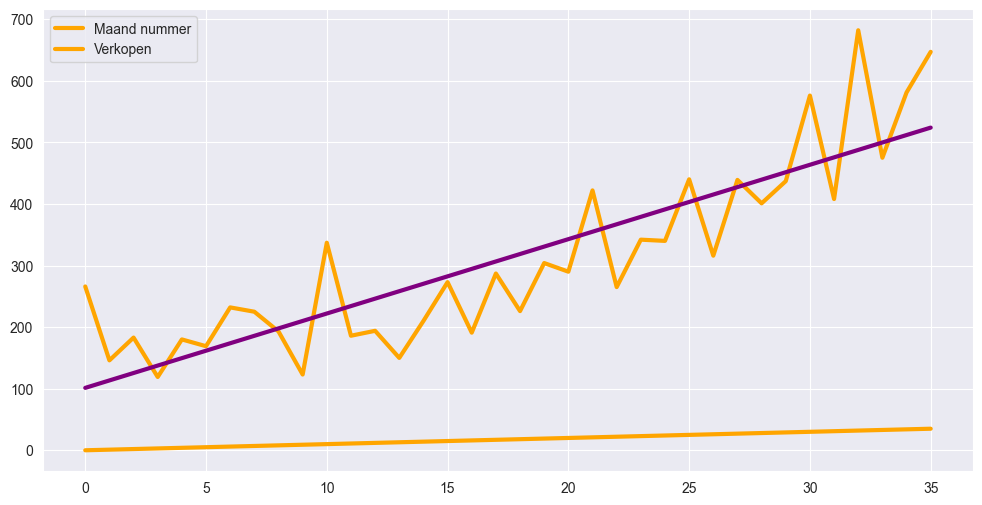

In [141]:
from sklearn import datasets, linear_model
x = df.index.values
y = df['Verkopen'].values


regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)

print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

df.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

d. Gebruik seizoensregressie om een voorspelling van de verkopen te doen. Wat is de mean absolute error van deze techniek?

In [142]:
df['trendlijn'] = df.index*regressionline.coef_[0] + regressionline.intercept_
df.head()

df['residuen'] = df['Verkopen'] - df['trendlijn']
print(df['residuen'].mean())
df.head()


-2.0526790144180672e-14


,Maand,Maand nummer,Verkopen,trendlijn,residuen
0,januari,0,266,101.325826,164.674174
1,februari,1,146,113.400858,32.599142
2,maart,2,183,125.475890,57.524110
3,april,3,119,137.550922,-18.550922
4,mei,4,180,149.625955,30.374045


In [143]:
df2 = df.groupby(['Maand']).mean()
df2


,Maand nummer,Verkopen,trendlijn,residuen
Maand,,,,
april,15.0,277.000000,282.451308,-5.451308
augustus,19.0,312.333333,330.751437,-18.418104
december,23.0,391.666667,379.051566,12.615101
februari,13.0,245.333333,258.301244,-12.967911
januari,12.0,266.666667,246.226212,20.440455
juli,18.0,344.666667,318.676405,25.990262
juni,17.0,297.666667,306.601373,-8.934706
maart,14.0,236.333333,270.376276,-34.042943
mei,16.0,257.333333,294.526341,-37.193007


In [144]:
seizoensregressie = []
for i in range(len(df)):
    seizoensregressie.append(
        df.loc[i, 'trendlijn'] + df2.loc[df.loc[i, 'Maand'], 'residuen'])

df['seizoensregressie'] = seizoensregressie
df.head()


,Maand,Maand nummer,Verkopen,trendlijn,residuen,seizoensregressie
0,januari,0,266,101.325826,164.674174,121.766281
1,februari,1,146,113.400858,32.599142,100.432947
2,maart,2,183,125.475890,57.524110,91.432947
3,april,3,119,137.550922,-18.550922,132.099614
4,mei,4,180,149.625955,30.374045,112.432947


In [145]:
df['mae'] = abs(df['seizoensregressie'] - df['Verkopen'])
df


,Maand,Maand nummer,Verkopen,trendlijn,residuen,seizoensregressie,mae
0,januari,0,266,101.325826,164.674174,121.766281,144.233719
1,februari,1,146,113.400858,32.599142,100.432947,45.567053
2,maart,2,183,125.475890,57.524110,91.432947,91.567053
3,april,3,119,137.550922,-18.550922,132.099614,13.099614
4,mei,4,180,149.625955,30.374045,112.432947,67.567053
5,juni,5,169,161.700987,7.299013,152.766281,16.233719
6,juli,6,232,173.776019,58.223981,199.766281,32.233719
7,augustus,7,225,185.851051,39.148949,167.432947,57.567053
8,september,8,193,197.926083,-4.926083,243.432947,50.432947
9,oktober,9,123,210.001115,-87.001115,195.099614,72.099614


In [146]:
print(df['mae'].mean())


59.933376233376244


In [149]:
df['Voorspelling'] = df['seizoensregressie'] + df['residuen']

e. Plot de echte waarde en de waarden van de voorspellingstechniek op dezelfde grafiek

Text(0, 0.5, 'Maand')

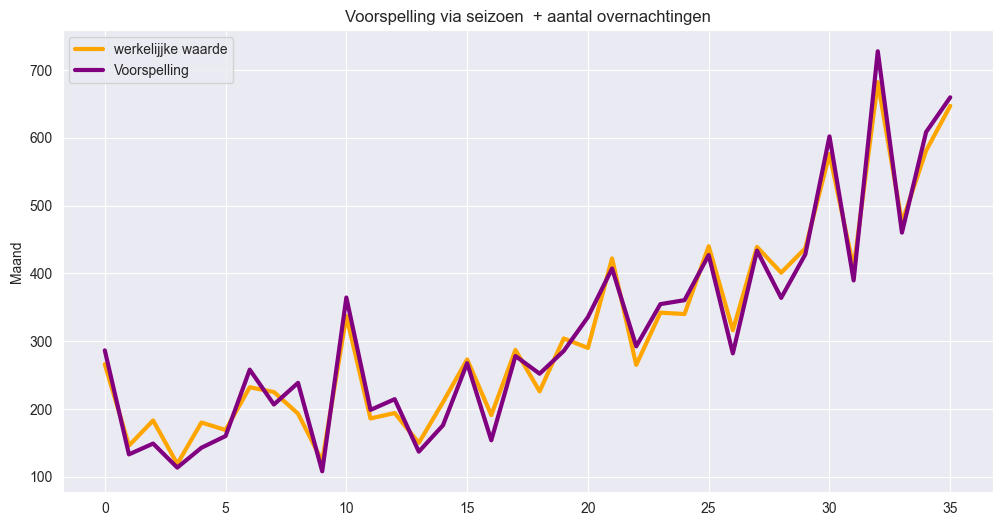

In [151]:
df['Verkopen'].plot(color='orange', linewidth=3, figsize=(12, 6))
df['Voorspelling'].plot(color='purple', linewidth=3)
plt.legend(labels=['werkelijjke waarde', 'Voorspelling'])
plt.title("Voorspelling via seizoen  + aantal overnachtingen")
plt.xlabel(df.index.name)
plt.ylabel(df.columns[0])
